<a href="https://colab.research.google.com/github/Nimere1990/K-means/blob/main/%D0%95%D1%80%D1%91%D0%BC%D0%B8%D0%BD_%D0%98_%D0%95_%2248_5_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%8F%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Проведите сегментацию клиентов используя три признака одновременно ("Age", "Annual Income", "Spending Score"). Визуализируйте результаты в 3D.
2. Примените k-means++ и стандартный k-means с разными random_state. Сравните стабильность результатов через несколько запусков.
3. Проанализируйте выбросы в данных, удалите их и сравните результаты кластеризации до и после удаления выбросов.
4. Используйте метод силуэта для оценки качества кластеризации при разных k (от 2 до 8) и визуализируйте силуэтные коэффициенты.
5. Создайте новые признаки (например, отношение расходов к доходам) и проведите кластеризацию с включением этих признаков. Сравните с базовой моделью.

1. Импорт библиотек и загрузка данных

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [ ]:
# Загрузка данных
url = "https://storage.yandexcloud.net/academy.ai/Mall_Customers.csv"
data = pd.read_csv(url)
print(data.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


2. Предварительная обработка данных

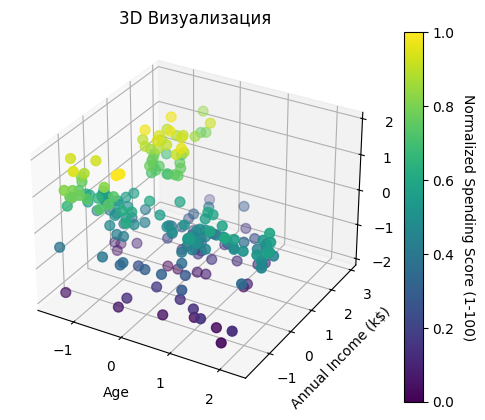

In [ ]:
# Выбор признаков
features = data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Стандартизация данных
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Визуализация данных в 3D с цветами
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Установка цветов на основе "Spending Score"
# Нормализуем Spending Score для использования в цветах
norm_spending_score = (features["Spending Score (1-100)"] - features["Spending Score (1-100)"].min()) / (features["Spending Score (1-100)"].max() - features["Spending Score (1-100)"].min())
colors = plt.cm.viridis(norm_spending_score)  # Выбор цветовой карты

# Создание 3D графика
sc = ax.scatter(scaled_features[:, 0], scaled_features[:, 1], scaled_features[:, 2], c=colors, s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('3D Визуализация')

# Добавление цветовой шкалы
cbar = plt.colorbar(sc)
cbar.set_label('Normalized Spending Score (1-100)', rotation=270, labelpad=15)

plt.show()

3. Кластеризация с K-means++

In [ ]:
# Кластеризация и оценка качества
silhouette_scores = []
k_range = range(2, 9)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

4. Визуализация силуэтных коэффициентов

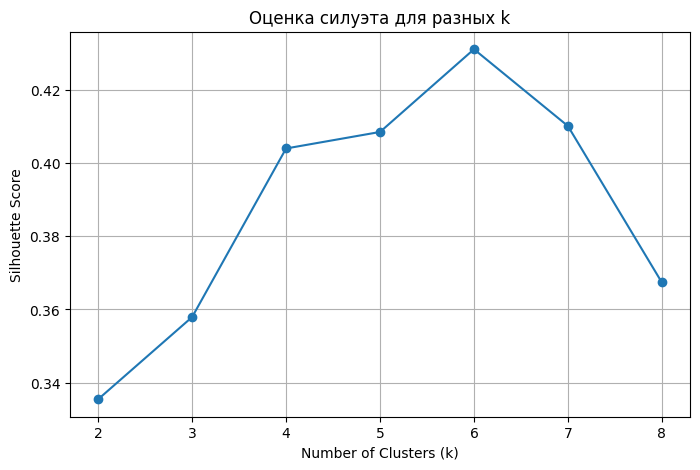

In [ ]:
# Визуализация силуэтных коэффициентов
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Оценка силуэта для разных k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid()
plt.show()


5. Удаление выбросов

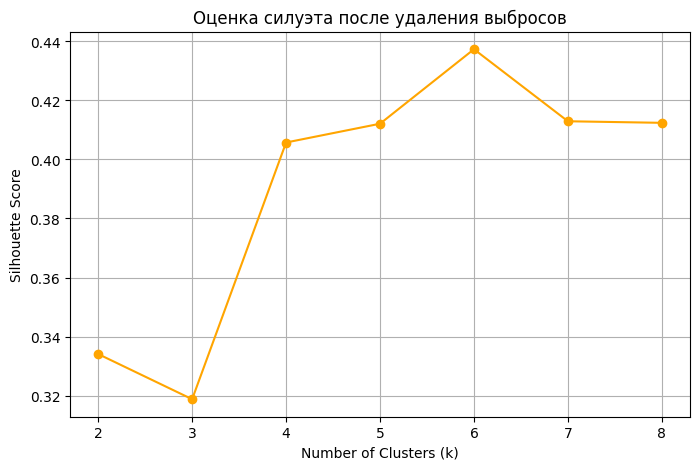

In [ ]:
# Определение выбросов
q1 = features.quantile(0.25)
q3 = features.quantile(0.75)
iqr = q3 - q1
filtered_data = features[~((features < (q1 - 1.5 * iqr)) | (features > (q3 + 1.5 * iqr))).any(axis=1)]

# Стандартизация и кластеризация после удаления выбросов
scaled_filtered_features = scaler.fit_transform(filtered_data)
silhouette_scores_filtered = []

for k in k_range:
    kmeans_filtered = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans_filtered.fit(scaled_filtered_features)
    score = silhouette_score(scaled_filtered_features, kmeans_filtered.labels_)
    silhouette_scores_filtered.append(score)

# Визуализация результатов
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores_filtered, marker='o', color='orange')
plt.title('Оценка силуэта после удаления выбросов')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid()
plt.show()


6. Создание новых признаков и кластеризация

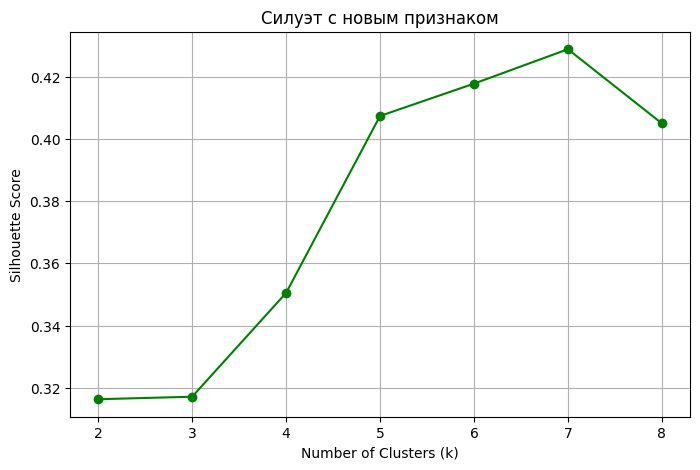

In [ ]:
# Создание нового признака
data['Income_Spending_Ratio'] = data['Annual Income (k$)'] / data['Spending Score (1-100)']

# Выбор новых признаков
new_features = data[["Age", "Annual Income (k$)", "Spending Score (1-100)", "Income_Spending_Ratio"]]
scaled_new_features = scaler.fit_transform(new_features)

# Кластеризация и оценка качества новой модели
silhouette_scores_new = []
for k in k_range:
    kmeans_new = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans_new.fit(scaled_new_features)
    score_new = silhouette_score(scaled_new_features, kmeans_new.labels_)
    silhouette_scores_new.append(score_new)

# Визуализация результатов
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores_new, marker='o', color='green')
plt.title('Силуэт с новым признаком')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid()
plt.show()

Оценка кластеризации

In [ ]:
def evaluate_clustering(X, labels, centroids):
    # Внутрикластерная дисперсия
    inertia = np.sum([np.sum((X[labels == i] - center) ** 2) for i, center in enumerate(centroids)])

    # Силуэтный коэффициент
    silhouette = silhouette_score(X, labels)

    print(f'Внутрикластерная дисперсия: {inertia:.2f}')
    print(f'Силуэтный коэффициент: {silhouette:.2f}')

    return inertia, silhouette

# Оценка результатов
evaluate_clustering(scaled_new_features, kmeans_new.labels_, kmeans_new.cluster_centers_)


Внутрикластерная дисперсия: 130.63
Силуэтный коэффициент: 0.40


(130.62645677306222, 0.4049520794044156)

Анализ результатов.

Как видно из построенных графиков в данном наборе данных можно выделить 6 кластеров, но придобавлении нового признака (Соотношение доходов и расходов) количество кластеров увеличилось до 7.

